In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset into pandas dataframe
df = pd.read_csv("diabetic_data.csv")

In [3]:
# Data Cleaning and Transformation #

In [4]:
# Show the shape of the data
print("Shape of the data:", df.shape)

Shape of the data: (101766, 50)


In [5]:
# Delete the column 'encounter_id'
df.drop(columns=['encounter_id'], inplace=True)

In [6]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.shape

(101766, 49)

In [8]:
# Show summary of missing values before replacing '?'
print("\n Summary of missing values before replacing '?' with NaN: \n" , df.isnull().sum())


 Summary of missing values before replacing '?' with NaN: 
 patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride          

In [9]:
# Identify missing values in the columns and replace '?' with NaN
df.replace('?', np.nan, inplace=True)

In [10]:
# Show summary of missing values after replacing '?'
print("Summary of missing values after replacing '?' with NaN: \n",df.isnull().sum())

Summary of missing values after replacing '?' with NaN: 
 patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride             

In [11]:
df.shape

(101766, 49)

In [12]:
# Convert 'readmitted' feature to binary
df['readmitted'] = df['readmitted'].replace({"<30": 1, ">30": 0, "NO": 0}, inplace=False)

In [14]:
df.head(15)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,0
6,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,0
8,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [15]:
# Check the datatype of each column
print("\nDatatypes of each column:\n", df.dtypes)


Datatypes of each column:
 patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                

In [16]:
# For each column calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values for each column:\n",missing_percentage)


Percentage of missing values for each column:
 patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
na

In [17]:
# Drop columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
# Delete near zero-variance columns
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                           'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 
                           'troglitazone', 'tolazamide', 'examide', 'citoglipton', 
                           'glyburide-metformin', 'glipizide-metformin', 
                           'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                           'metformin-pioglitazone']
df.drop(columns=near_zero_variance_cols, inplace=True)

In [19]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,...,NaN,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,...,NaN,No,No,No,No,No,Up,Ch,Yes,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,...,NaN,No,Steady,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,...,NaN,No,No,No,No,No,Up,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,...,NaN,No,Steady,No,No,No,Steady,Ch,Yes,0


In [20]:
df.shape

(101766, 30)

In [21]:
# Drop rows with null values
df.dropna(axis=0, how='any', inplace=True)

In [22]:
df.shape

(4166, 30)

In [23]:
# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:\n",df.describe())


Summary statistics of numerical columns:
         patient_nbr  admission_type_id  discharge_disposition_id  \
count  4.166000e+03        4166.000000               4166.000000   
mean   6.124034e+07           1.833413                  2.697312   
std    3.936169e+07           0.753764                  4.024514   
min    7.290000e+02           1.000000                  1.000000   
25%    2.480188e+07           1.000000                  1.000000   
50%    5.984079e+07           2.000000                  1.000000   
75%    9.483692e+07           2.000000                  3.000000   
max    1.886349e+08           6.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count          4166.000000       4166.000000         4166.000000   
mean              5.148104          4.944311           53.853577   
std               2.673494          3.107173           16.695628   
min               1.000000          1.000000            1.000000   
25% 

In [32]:
import scipy
from scipy import stats
from scipy.stats import zscore

In [35]:
#Z=score for finding outliers
numerical_columns = df.select_dtypes(include=[np.number]).columns
z_scores = stats.zscore(df[numerical_columns])
outliers = (np.abs(z_scores) > 3).any(axis=1)
data_no_outliers = df[~outliers]

In [36]:
print(data_no_outliers)
print(f"Number of identified outliers: {outliers.sum()}")

        patient_nbr             race  gender      age  admission_type_id  \
23879       7239654        Caucasian  Female  [70-80)                  1   
24069      14244093        Caucasian  Female  [30-40)                  1   
24117        537543        Caucasian  Female  [30-40)                  2   
24177        354474        Caucasian    Male  [70-80)                  2   
24228       1186533  AfricanAmerican  Female  [30-40)                  1   
...             ...              ...     ...      ...                ...   
101662     97892019  AfricanAmerican    Male  [50-60)                  2   
101684     31352391         Hispanic    Male  [30-40)                  1   
101688     34751961        Caucasian    Male  [20-30)                  1   
101735    106595208        Caucasian    Male  [70-80)                  2   
101749    106392411        Caucasian  Female  [70-80)                  3   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
23879       

In [74]:
#feature normalization
from sklearn.preprocessing import MinMaxScaler

In [75]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [76]:
# Define the features to be normalized (assuming data is your DataFrame)
features_to_normalize = df.select_dtypes(include=np.number).columns

In [77]:
# Apply Min-Max scaling to selected features
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [78]:
# Display the first few rows of the scaled data
print("Scaled data:",df.head())

Scaled data:        patient_nbr             race  gender      age  admission_type_id  \
23879     0.038375        Caucasian  Female  [70-80)                0.0   
24069     0.075508        Caucasian  Female  [30-40)                0.0   
24117     0.002846        Caucasian  Female  [30-40)                0.2   
24177     0.001875        Caucasian    Male  [70-80)                0.2   
24228     0.006286  AfricanAmerican  Female  [30-40)                0.0   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
23879                  0.074074             0.238095          0.846154   
24069                  0.000000             0.238095          0.923077   
24117                  0.000000             0.142857          0.769231   
24177                  0.074074             0.000000          0.846154   
24228                  0.000000             0.238095          0.384615   

      payer_code medical_specialty  ...  A1Cresult  metformin  glipizide  \
23879         U

In [79]:
# Shape of resulting dataframe
df.shape

(4166, 30)

In [80]:
# Data Visualisation #

In [101]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot

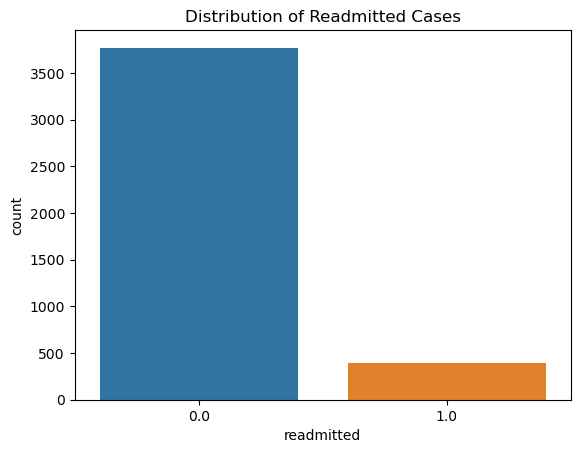

In [102]:
#Plot the distribution of unique classes of the target variable, i.e., readmitted
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmitted Cases')
plt.show()

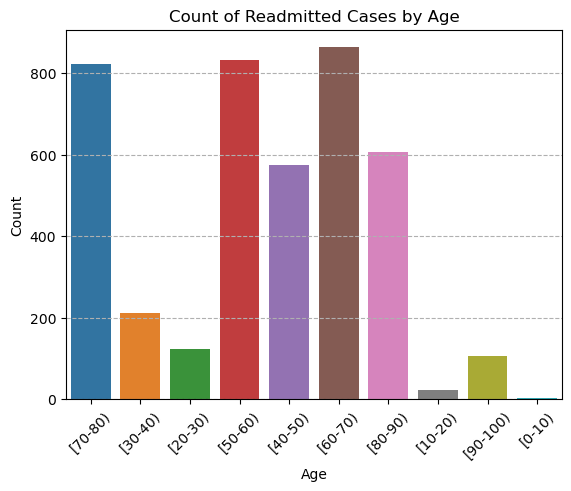

In [103]:
# Plot the count of number of readmitted cases against age
sns.countplot(x='age',data=df)  # Specify the hue order
plt.title('Count of Readmitted Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

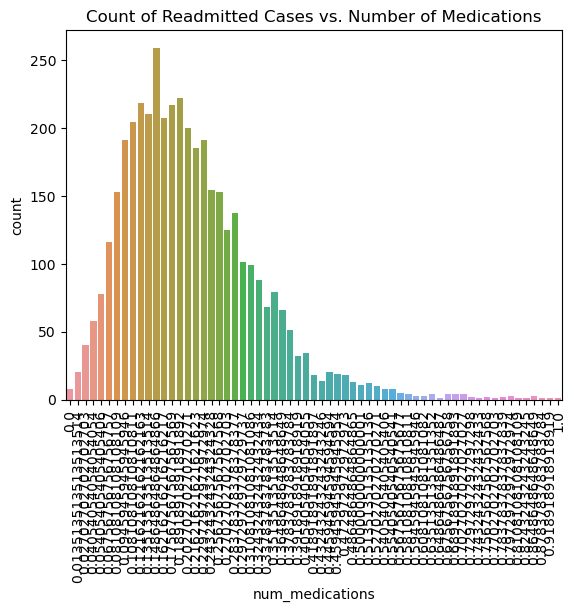

In [104]:
#Plot a graph that displays the count of target variable against the number of medications
sns.countplot(x='num_medications',data=df)
plt.title('Count of Readmitted Cases vs. Number of Medications')
plt.xticks(rotation=90)
plt.show()

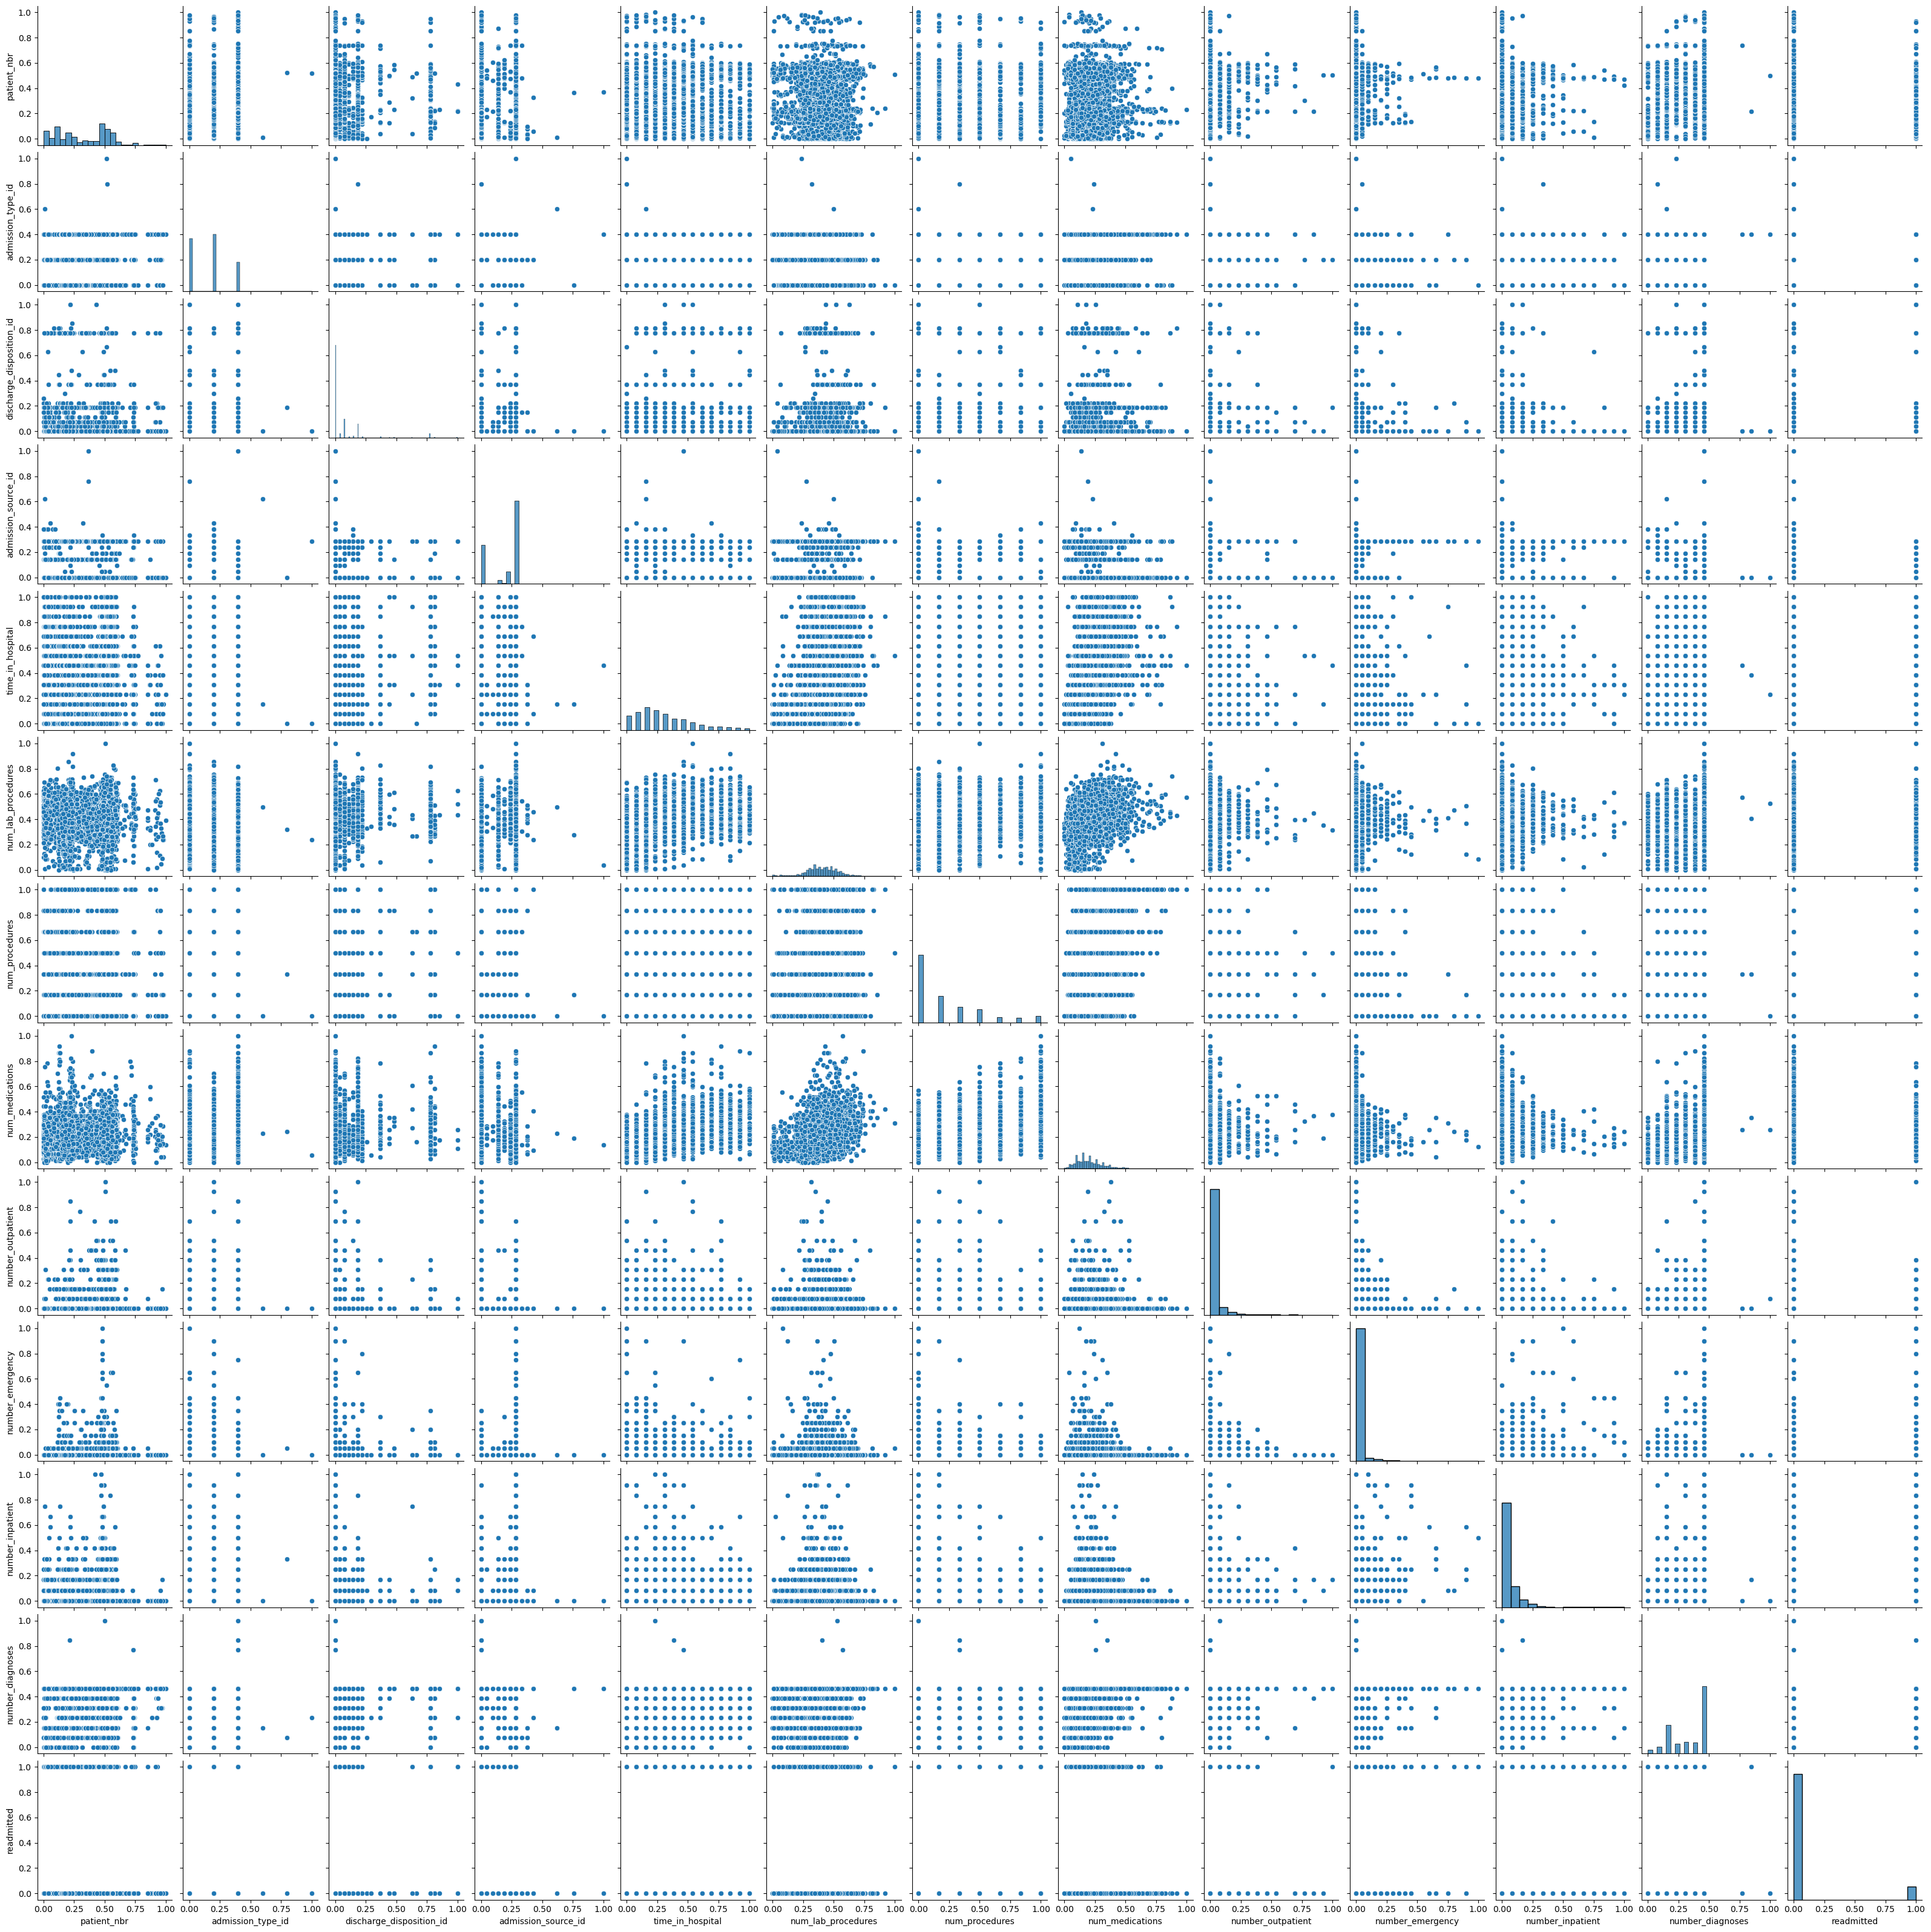

In [106]:
import warnings
# Suppress FutureWarning related to use_inf_as_na
warnings.filterwarnings("ignore", category=FutureWarning)
# Show the scatter matrix plot
sns.pairplot(df)
plt.show()

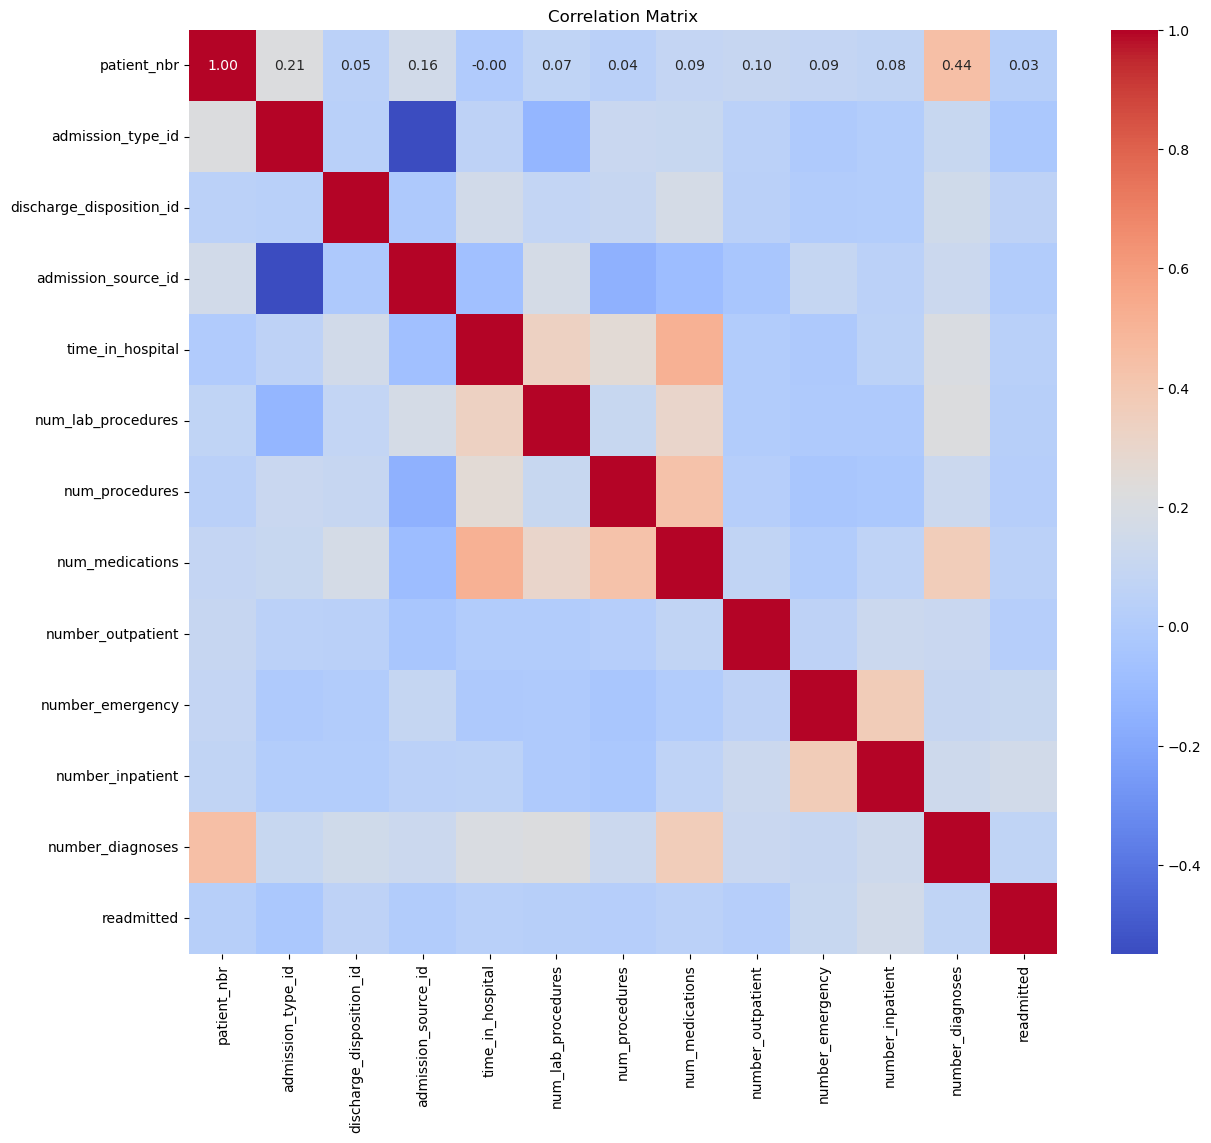

In [112]:
# Show the plot for correlation matrix
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [113]:
# Identify pairs of features that are highly correlated
highly_correlated_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1]  # Remove self-correlation
highly_correlated_pairs = highly_correlated_pairs.drop_duplicates()

# Display the top 5 pairs of highly correlated features
print(highly_correlated_pairs.head(5))

time_in_hospital  num_medications     0.514890
number_diagnoses  patient_nbr         0.443716
num_procedures    num_medications     0.426241
number_emergency  number_inpatient    0.371922
number_diagnoses  num_medications     0.369500
dtype: float64


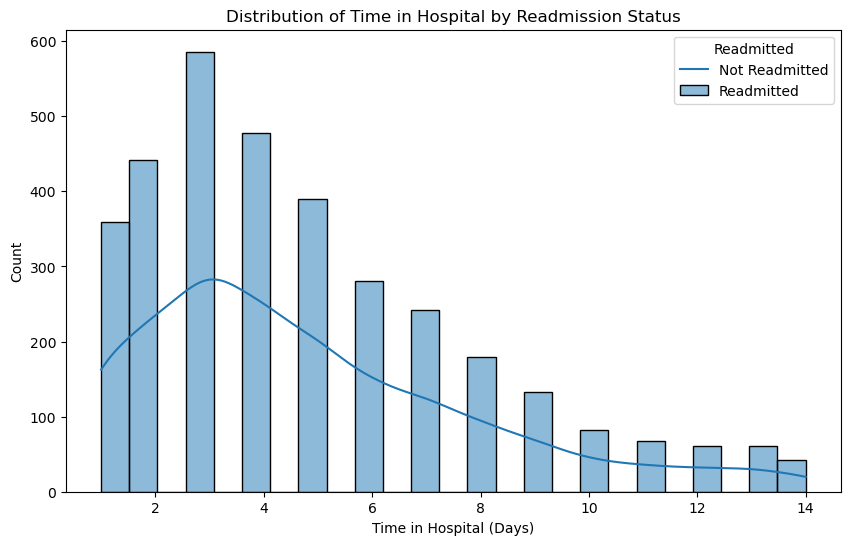

In [114]:
# Plot 1: Distribution of Time in Hospital by Readmission Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data_no_outliers, x='time_in_hospital', hue='readmitted', multiple='stack', kde=True)
plt.title('Distribution of Time in Hospital by Readmission Status')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

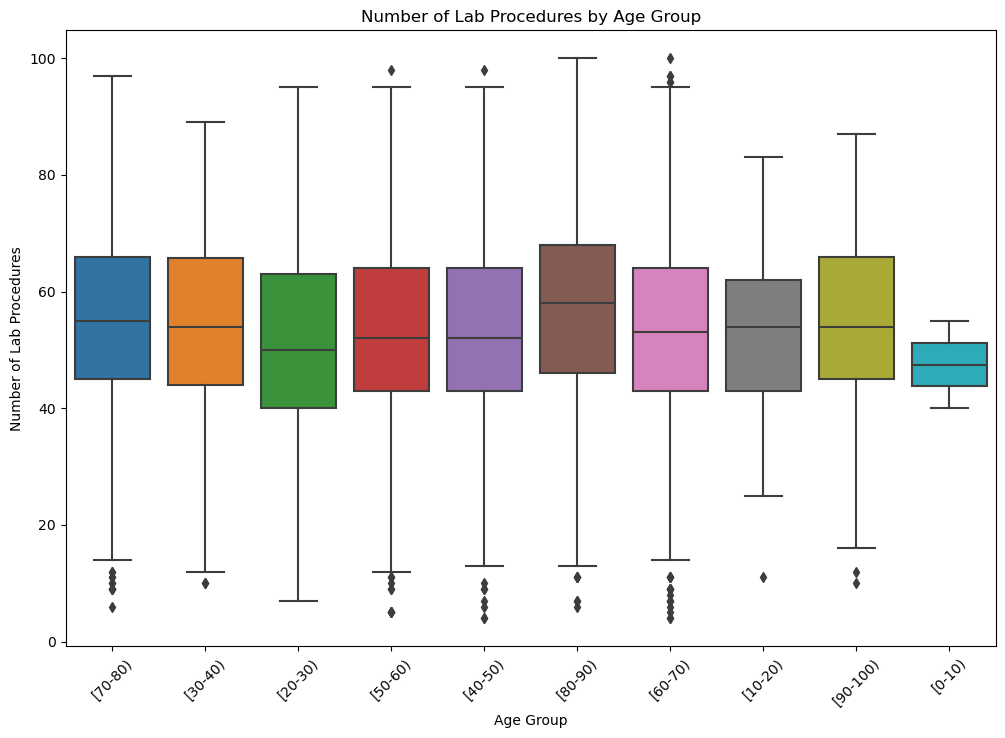

In [115]:
# Plot 2: Boxplot of Number of Lab Procedures by Age Group
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_no_outliers, x='age', y='num_lab_procedures')
plt.title('Number of Lab Procedures by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Lab Procedures')
plt.xticks(rotation=45)
plt.show()

In [116]:
#Model Building

In [124]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [139]:
# Preprocess 'age' column
age_mapping = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}
df['age'] = df['age'].map(age_mapping)

In [140]:
#Select the predictors that would have impact in predicting readmission
predictors = ['age', 'num_medications', 'time_in_hospital', 'num_lab_procedures', 'num_procedures']


In [141]:
# Split data into predictors and target variable
X = df[predictors]
y = df['readmitted']

In [142]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [151]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.53859854 0.53921268 0.53869304 0.53869304 0.53777177]
Mean CV Score: 0.538593811433311


In [152]:
# Predict on the test set
y_pred =log_reg.predict(X_test)

In [156]:
# Evaluate performance metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred,zero_division='warn'))


Accuracy Score: 0.5381743146310307

Confusion Matrix:
[[    0    10  2275]
 [    0    40  7077]
 [    0    38 10914]]

Classification Report:
              precision    recall  f1-score   support

         <30       0.00      0.00      0.00      2285
         >30       0.45      0.01      0.01      7117
          NO       0.54      1.00      0.70     10952

    accuracy                           0.54     20354
   macro avg       0.33      0.33      0.24     20354
weighted avg       0.45      0.54      0.38     20354



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
# Balance the data using undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_balanced, y_balanced = undersampler.fit_resample(X_train, y_train)

In [164]:
# Train the model again on balanced data
model_balanced = LogisticRegression(max_iter=1000)
model_balanced.fit(X_balanced, y_balanced)

LogisticRegression(max_iter=1000)

In [165]:
# Predict on the test set with balanced data
y_pred_balanced = model_balanced.predict(X_test)

In [167]:
# Evaluate performance metrics on balanced data
print("\nAccuracy Score on Balanced Data:", accuracy_score(y_test, y_pred_balanced))
print("\nConfusion Matrix on Balanced Data:")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report on Balanced Data:")
print(classification_report(y_test, y_pred_balanced,zero_division='warn'))


Accuracy Score on Balanced Data: 0.34966100029478236

Confusion Matrix on Balanced Data:
[[    0  2285     0]
 [    0  7117     0]
 [    0 10952     0]]

Classification Report on Balanced Data:
              precision    recall  f1-score   support

         <30       0.00      0.00      0.00      2285
         >30       0.35      1.00      0.52      7117
          NO       0.00      0.00      0.00     10952

    accuracy                           0.35     20354
   macro avg       0.12      0.33      0.17     20354
weighted avg       0.12      0.35      0.18     20354



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
